# Intro

This sheet takes in the output of linear models, and attempts to find the projects that have changed more or less. 

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("generated/coefficients.csv")

hurdle_coefficients_data = data.loc[data['ModelType'] == 'Hurdle']

significant_hurdle = hurdle_coefficients_data.loc[hurdle_coefficients_data['PValue'] < 0.05]

coefficients_data = data.loc[data['ModelType'] == "Non-Hurdle"]

significant_data = coefficients_data.loc[coefficients_data['PValue'] < 0.05]

data.head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
0,Leaflet/Leaflet,29,0.598896,0.718951,0.174964,28.104857,Non-Hurdle
1,MarkUsProject/Markus,419,0.000327,0.308724,-0.612636,69.127617,Non-Hurdle
2,NancyFx/Nancy,111,0.521594,0.253706,0.199153,74.629398,Non-Hurdle
3,OP2/PyOP2,36,0.123279,0.564416,-1.109590,43.558433,Non-Hurdle
4,OPM/opm-core,20,0.913217,0.883010,-0.081987,11.699025,Non-Hurdle


In [2]:
data.tail()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
568,notepadqq/notepadqq,14,0.255021,NaN,-0.607190,1.352916,Hurdle
569,whatwg/dom,46,0.649895,0.401098,-0.238545,0.696675,Hurdle
570,marionettejs/backbone.marionette,6,NaN,NaN,NaN,NaN,Hurdle
571,SonarSource/sonar-java,94,0.443339,0.295421,-0.408379,1.522031,Hurdle
572,Netflix/eureka,46,0.494639,NaN,-0.279393,1.189113,Hurdle


# Plots for the linear models

These models predict the number of effective comments per PR. 

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.scatter(coefficients_data['R2'], coefficients_data['PValue'], c=np.log(coefficients_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("R2 of model")
plt.ylabel("Significance of Travis introduction")

plt.title("How significant is Travis, and how good is the model fit")

plt.axhline(y=0.05, color='r', linestyle='-', linewidth=0.5)

plt.show()

<Figure size 900x400 with 2 Axes>

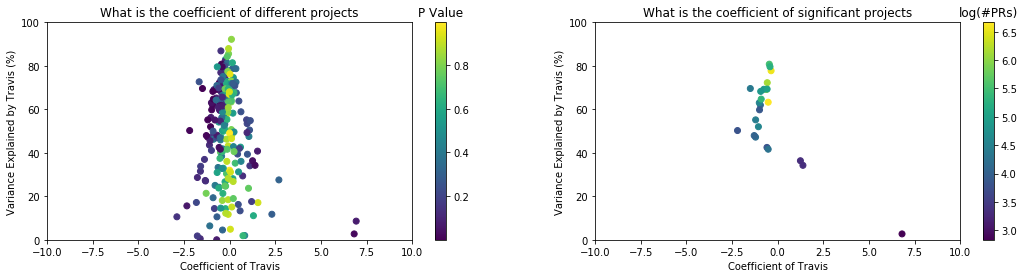

In [4]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.scatter(coefficients_data['Coefficient'], coefficients_data['PercentageExplained'], c=coefficients_data["PValue"])

clb = plt.colorbar()
clb.ax.set_title('P Value')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-10,10)
plt.ylim(0,100)

plt.title("What is the coefficient of different projects")

plt.subplot(1, 2, 2)



plt.scatter(significant_data['Coefficient'], significant_data['PercentageExplained'], c=np.log(significant_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-10,10)
plt.ylim(0,100)


plt.title("What is the coefficient of significant projects")

plt.show()

In [5]:
print("There are {} significant projects, {} for which a model has been built, out of 390 projects with enough data for R analysis".
      format(len(significant_data), len(coefficients_data)))

There are 24 significant projects, 252 for which a model has been built, out of 390 projects with enough data for R analysis


In [6]:
# Negative impact
significant_data.sort_values(by=["Coefficient"]).head(10)

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
27,JuliaLang/julia,45,0.012456,0.497510,-2.192378,50.248974,Non-Hurdle
50,crate/crate,80,0.002412,0.304236,-1.490342,69.576404,Non-Hurdle
240,openmicroscopy/ome-documentation,57,0.015215,0.520573,-1.278086,47.942723,Non-Hurdle
114,puppetlabs/puppetdb,66,0.003472,0.527865,-1.203013,47.213493,Non-Hurdle
183,scummvm/scummvm,85,0.005260,0.448373,-1.199779,55.162732,Non-Hurdle
150,SimpleMachines/SMF2.1,98,0.000090,0.479996,-1.047845,52.000368,Non-Hurdle
161,emberjs/website,96,0.044045,0.369814,-1.000470,63.018624,Non-Hurdle
145,splitbrain/dokuwiki,48,0.014896,0.402321,-0.986486,59.767886,Non-Hurdle
131,pioneerspacesim/pioneer,60,0.015100,0.380398,-0.940232,61.960181,Non-Hurdle
55,DarkstarProject/darkstar,130,0.000215,0.317438,-0.923011,68.256203,Non-Hurdle


In [7]:
# Positive impact
significant_data.sort_values(by=["Coefficient"], ascending=False).head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
223,openmrs/openmrs-core,17,0.019976,0.972873,6.816349,2.712711,Non-Hurdle
196,plataformatec/simple_form,28,0.029892,0.657572,1.390034,34.242821,Non-Hurdle
148,scrapy/scrapy,28,0.042253,0.636356,1.252268,36.364440,Non-Hurdle
25,appcelerator/titanium_mobile,712,0.009133,0.222500,-0.353259,77.750002,Non-Hurdle
90,nim-lang/Nim,194,0.013170,0.204050,-0.412666,79.595034,Non-Hurdle


In [8]:
# What is a random project showing an average effect
significant_data.sort_values(by=["Coefficient"], ascending=False).iloc[[15]]

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
131,pioneerspacesim/pioneer,60,0.0151,0.380398,-0.940232,61.960181,Non-Hurdle


# Plots for the hurdle models

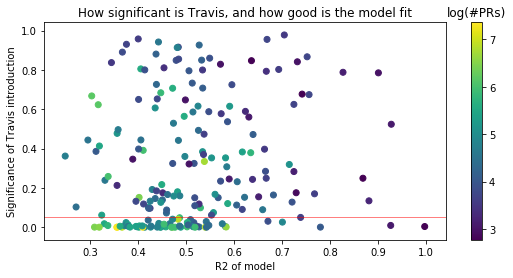

In [9]:
plt.figure(figsize=(9,4))

plt.scatter(hurdle_coefficients_data['R2'], hurdle_coefficients_data['PValue'], c=np.log(hurdle_coefficients_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("R2 of model")
plt.ylabel("Significance of Travis introduction")

plt.title("How significant is Travis, and how good is the model fit")

plt.axhline(y=0.05, color='r', linestyle='-', linewidth=0.5)

plt.show()

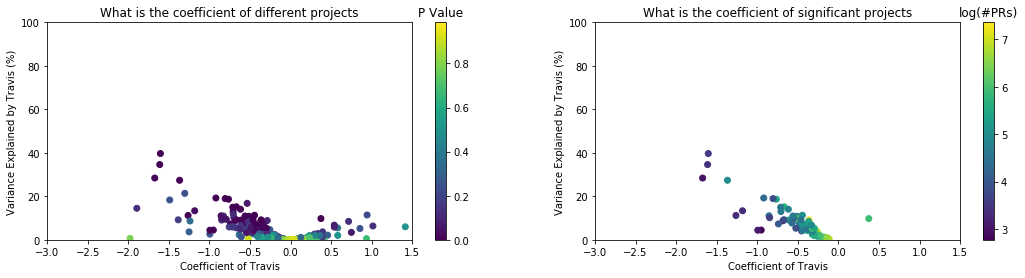

In [10]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.scatter(hurdle_coefficients_data['Coefficient'], hurdle_coefficients_data['PercentageExplained'], c=hurdle_coefficients_data["PValue"])

clb = plt.colorbar()
clb.ax.set_title('P Value')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-3,1.5)
plt.ylim(0,100)

plt.title("What is the coefficient of different projects")

plt.subplot(1, 2, 2)



plt.scatter(significant_hurdle['Coefficient'], significant_hurdle['PercentageExplained'], c=np.log(significant_hurdle["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-3,1.5)
plt.ylim(0,100)


plt.title("What is the coefficient of significant projects")

plt.show()

In [11]:
print("There are {} significant projects, {} for which a model has been built, out of 390 projects with enough data for R analysis".
      format(len(significant_hurdle), len(hurdle_coefficients_data)))

hurdle_large_neg = significant_hurdle.loc[significant_hurdle["Coefficient"] < -0.5]
hurdle_neg_to_pos = significant_hurdle.loc[significant_hurdle["Coefficient"] >= -0.5]

There are 76 significant projects, 321 for which a model has been built, out of 390 projects with enough data for R analysis


## Does significance for Hurdle and non hurdle agree?

In [12]:
hurdle_sig_slugs = set(significant_hurdle["ProjectName"])
sig_slugs = set(significant_data["ProjectName"])

print("There are {} hurdle sig projects, {} linear sig projects".format(len(hurdle_sig_slugs), len(sig_slugs)))

print("Interaction between the two sets is {}".format(len(sig_slugs.intersection(hurdle_sig_slugs))))

There are 76 hurdle sig projects, 24 linear sig projects
Interaction between the two sets is 11


# What if we look at the data

In [13]:
# Add empty columns

non_significant_data = coefficients_data.loc[coefficients_data["PValue"] >= 0.05]
non_sig_hurdle_data = hurdle_coefficients_data.loc[hurdle_coefficients_data["PValue"] >= 0.05]

pd.options.mode.chained_assignment = None

def add_column(name, initial_value=np.nan):
    significant_data[name] = initial_value
    non_significant_data[name] = initial_value

add_column("GeneralComments_mean")
add_column("GeneralComments_median")

# Init Mongo collections

from pymongo import MongoClient
from bson.objectid import ObjectId

mongo_client = MongoClient()
database = mongo_client["graduation"]
pull_requests_collection = database["pull_requests"]
projects_collection = database["projects"]
commits_collection = database["commits"]

# Set the columns

def write_val(data_frame, column_name, method):
    for index, row in data_frame.iterrows():
        data_frame.loc[index, column_name] = method(row["ProjectName"])
        
from statistics import mean, median
        
def compute_general_comments_mean(slug):
    project_owner = slug.split("/")[0]
    project_name= slug.split("/")[1]
    
    query = [
        {
            '$match': {
                'project_owner': project_owner,
                'project_name': project_name
            }
        },
        {
            '$project': {
                'numberOfGenComments': {
                    '$size': '$raw_comments'
                } 
            }
        }
    ]
    
    general_comments_size = [item["numberOfGenComments"] for item in pull_requests_collection.aggregate(query)]
    
    return mean(general_comments_size)

def compute_general_comments_median(slug):
    project_owner = slug.split("/")[0]
    project_name= slug.split("/")[1]
    
    query = [
        {
            '$match': {
                'project_owner': project_owner,
                'project_name': project_name
            }
        },
        {
            '$project': {
                'numberOfGenComments': {
                    '$size': '$raw_comments'
                } 
            }
        }
    ]
    
    general_comments_size = [item["numberOfGenComments"] for item in pull_requests_collection.aggregate(query)]
    
    return median(general_comments_size)

write_val(significant_data, 'GeneralComments_mean', compute_general_comments_mean)
write_val(non_significant_data, 'GeneralComments_mean', compute_general_comments_mean)

write_val(significant_data, 'GeneralComments_median', compute_general_comments_median)
write_val(non_significant_data, 'GeneralComments_median', compute_general_comments_median)

In [14]:
significant_data.head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType,GeneralComments_mean,GeneralComments_median
1,MarkUsProject/Markus,419,0.000327,0.308724,-0.612636,69.127617,Non-Hurdle,1.116041,0.0
10,PX4/Firmware,131,0.000200,0.307789,-0.751601,69.221142,Non-Hurdle,3.789206,1.0
25,appcelerator/titanium_mobile,712,0.009133,0.222500,-0.353259,77.750002,Non-Hurdle,2.109647,1.0
27,JuliaLang/julia,45,0.012456,0.497510,-2.192378,50.248974,Non-Hurdle,5.882011,2.0
39,cakephp/docs,466,0.000009,0.277399,-0.563274,72.260053,Non-Hurdle,1.163192,1.0


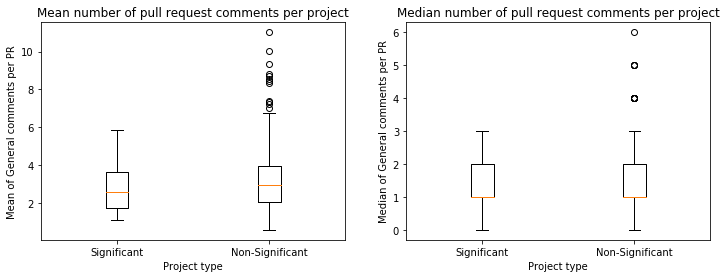

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)

plt.boxplot([significant_data["GeneralComments_mean"], non_significant_data["GeneralComments_mean"]])
plt.xticks([1, 2], ["Significant", "Non-Significant"])

plt.xlabel("Project type")
plt.ylabel("Mean of General comments per PR")

plt.title("Mean number of pull request comments per project")

plt.subplot(1, 2, 2)


plt.boxplot([significant_data["GeneralComments_median"], non_significant_data["GeneralComments_median"]])
plt.xticks([1, 2], ["Significant", "Non-Significant"])

plt.xlabel("Project type")
plt.ylabel("Median of General comments per PR")

plt.title("Median number of pull request comments per project")

plt.show()

# Data chrunching for time series

In [16]:
from datetime import datetime, timedelta
import effective_comments.find_effective as eff
    
def metrics_for_project_names(project_names):

    mongo_client = MongoClient()
    database = mongo_client["graduation"]
    pull_requests_collection = database["pull_requests"]
    projects_collection = database["projects"]
    commits_collection = database["commits"]
        
        
    period = 30
    periods = 24

    metrics = [[] for x in range(periods + 1)]

    for project_slug in project_names:
        project = projects_collection.find_one({'full_name':project_slug})

        prs = list(pull_requests_collection.find({'project_name': project["full_name"].split("/")[1],'project_owner': project["full_name"].split("/")[0]}))
        
        project["prs"] = prs

        #prs_before, prs_after = analysis_utilities.split_prs_on_build_date(project, prs, True)

        travis_date = project["status_travis_date"]

        start_date = travis_date - timedelta(days=period/2 + period*(periods/2))

        empty_period = False

        split_prs = []

        for i in range(periods + 1):
            end_date = start_date + timedelta(days=period)

            prs_in_period = []

            for pr in prs:
                if pr["created_at"] > start_date and pr["created_at"] < end_date:
                    prs_in_period.append(pr)

            if len(prs_in_period) == 0:
                empty_period = True
                break

            split_prs.append(prs_in_period)

            start_date = end_date

        if empty_period:
            continue


        for i in range(len(split_prs)):
            prs_in_period = split_prs[i]

            total_review_comments = 0
            total_effective = 0

            for pr in prs_in_period:

                

                total_effective += len([comment for comment in pr["review_comments"] if 'is_effective' in comment and comment["is_effective"]])
                total_review_comments += len([review_comment for review_comment in pr["review_comments"] if review_comment["in_reply_to_id"] is None])



            total = total_review_comments   

            if total == 0:
                share_effective_comments = 0
            else: 
                share_effective_comments = total_effective / total


            metrics[i].append(share_effective_comments)
            
    return metrics

metrics_hurdle_significant = metrics_for_project_names(significant_hurdle["ProjectName"])
metrics_significant = metrics_for_project_names(significant_data["ProjectName"])

metrics_hurdle_large_neg = metrics_for_project_names(hurdle_large_neg["ProjectName"])
metrics_hurdle_neg_to_pos = metrics_for_project_names(hurdle_neg_to_pos["ProjectName"])


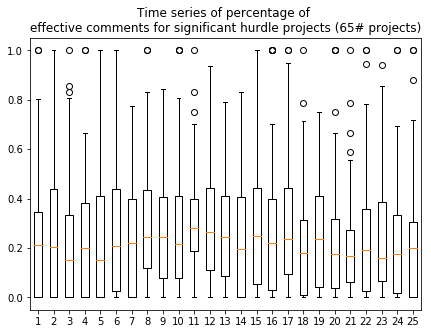

In [17]:
plt.figure(figsize=(7,5))



plt.boxplot(metrics_hurdle_significant)

plt.title("Time series of percentage of \neffective comments for significant hurdle projects ({}# projects)".format(len(metrics_hurdle_significant[0])))

plt.show()

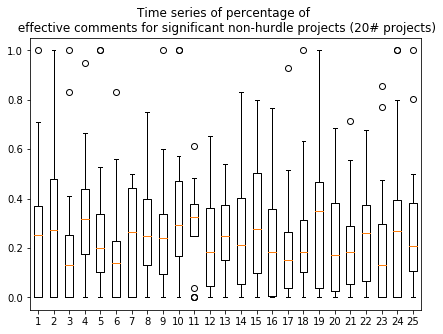

In [18]:
plt.figure(figsize=(7,5))



plt.boxplot(metrics_significant)

plt.title("Time series of percentage of \n effective comments for significant non-hurdle projects ({}# projects)".format(len(metrics_significant[0])))

plt.show()

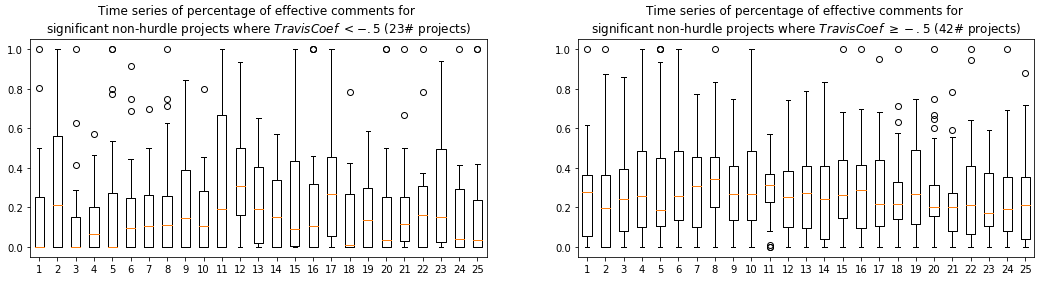

In [19]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.boxplot(metrics_hurdle_large_neg)

plt.title("Time series of percentage of effective comments for \nsignificant non-hurdle projects where $TravisCoef\ < -.5$ ({}# projects)".format(len(metrics_hurdle_large_neg[0])))

plt.subplot(1, 2, 2)


plt.boxplot(metrics_hurdle_neg_to_pos)

plt.title("Time series of percentage of effective comments for \nsignificant non-hurdle projects where $TravisCoef\ \geq -.5$ ({}# projects)".format(len(metrics_hurdle_neg_to_pos[0])))

plt.show()

# Preparing the bigram data

We go through the hurdle projects, and feed all effective comments through the bigramizer, furthermore, we feed all non-effective comments through the bi-gramizer and maintain counters for them as well. We can then later analyze these two counters.

In [20]:
from ngramizer import add_text_ngrams_to_counter, compute_deltas

from collections import Counter

effective_counter = Counter()
non_effective_counter = Counter()

linkback_effective = {}
linkback_non_effective = {}

for project_name in hurdle_coefficients_data["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
    
    
    for pr in project["prs"]:
        for comment in [comment for comment in pr["review_comments"] if comment["in_reply_to_id"] is None]:

            if "is_effective" in comment and comment["is_effective"] and "bigrams" in comment:
                bigrams = comment["bigrams"]
                
                for item in bigrams:
                    effective_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]
                
                
            elif "bigrams" in comment:
                bigrams = comment["bigrams"]
                
                for item in bigrams:
                    non_effective_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]
        

In [21]:
print("Effective: ")

for term in effective_counter.most_common(10):
    print("\t" + str(term))
    
print("Non Effective: ")

for term in non_effective_counter.most_common(10):
    print("\t" + str(term))

Effective: 
Non Effective: 
	(('M_USERNAME', 'M_ICODE'), 339)
	(('M_ICODE', 'M_USERNAME'), 264)
	(('I', 'think'), 174)
	(('M_USERNAME', 'M_USERNAME'), 156)
	(('I', 'would'), 81)
	(('M_ICODE', 'M_ICODE'), 71)
	(('M_USERNAME', 'I'), 40)
	(('I', 'see'), 34)
	(('I', "'ll"), 33)
	(('I', 'sure'), 32)


In [22]:
'''
Given a counter and search terms prints out the n most occuring items which
match the search term
'''
def search_counter(counter, term, n):
    temp_counter = Counter()
    for item in counter:
        if term in item[0] or term in item[1]:
            temp_counter[item] = counter[item]
            
            
    for item in temp_counter.most_common(n):
        print(str(item[0]) + " - " + str(item[1]/ sum(counter.values()) * 100) + "%   |   " + str(item[1]))




search_counter(effective_counter, 'travi', 10)
        
print("-----------")

search_counter(non_effective_counter, 'travi', 10)

-----------
('opam', 'travi') - 0.005558025789239662%   |   1
('travi', 'buildscript') - 0.005558025789239662%   |   1
('whatev', 'travi') - 0.005558025789239662%   |   1
('travi', 'run') - 0.005558025789239662%   |   1
('initi', 'travi') - 0.005558025789239662%   |   1
('travi', 'use') - 0.005558025789239662%   |   1
('mayb', 'travi') - 0.005558025789239662%   |   1
('travi', 'runner') - 0.005558025789239662%   |   1
('opposit', 'travi') - 0.005558025789239662%   |   1
('discard', 'travi') - 0.005558025789239662%   |   1


In [23]:
search_counter(effective_counter, 'build', 10)
        
print("-----------")

search_counter(non_effective_counter, 'build', 10)

-----------
('resourcebuild', 'class') - 0.011116051578479324%   |   2
('python', 'build') - 0.005558025789239662%   |   1
('build', 'msvc') - 0.005558025789239662%   |   1
('repeat', 'build') - 0.005558025789239662%   |   1
('concaten', 'build') - 0.005558025789239662%   |   1
('aggreg', 'build') - 0.005558025789239662%   |   1
('build', 'complet') - 0.005558025789239662%   |   1
('new', 'build') - 0.005558025789239662%   |   1
('build', 'field') - 0.005558025789239662%   |   1
('add', 'process.buildstep.buildstep.setdiagnost') - 0.005558025789239662%   |   1


In [24]:
search_counter(effective_counter, 'failur', 10)
        
print("-----------")

search_counter(non_effective_counter, 'failur', 10)

-----------
('us', 'failur') - 0.011116051578479324%   |   2
('failur', 'mode') - 0.005558025789239662%   |   1
('failur', 'even') - 0.005558025789239662%   |   1
('doctest', 'failur') - 0.005558025789239662%   |   1
('prevent', 'failur') - 0.005558025789239662%   |   1
('failur', 'summari') - 0.005558025789239662%   |   1
('M_ICODE', 'failur') - 0.005558025789239662%   |   1
('failur', 'instead') - 0.005558025789239662%   |   1
('silent', 'failur') - 0.005558025789239662%   |   1
('failur', 'non-determinist') - 0.005558025789239662%   |   1


In [25]:
eff_to_non_effective, non_eff_to_effective = compute_deltas(effective_counter, non_effective_counter)

print("Appears in non effective")

for term in eff_to_non_effective.most_common(10):
    print("\t" + str(term))
    
print("Appears in effective: ")

for term in non_eff_to_effective.most_common(10):
    print("\t" + str(term))

Appears in non effective
	(('M_USERNAME', 'M_ICODE'), 339)
	(('M_ICODE', 'M_USERNAME'), 264)
	(('I', 'think'), 174)
	(('M_USERNAME', 'M_USERNAME'), 156)
	(('I', 'would'), 81)
	(('M_ICODE', 'M_ICODE'), 71)
	(('M_USERNAME', 'I'), 40)
	(('I', 'see'), 34)
	(('I', "'ll"), 33)
	(('I', 'sure'), 32)
Appears in effective: 


In [26]:
sig_counter = Counter()
non_sig_counter = Counter()

linkback_sig = {}
linkback_non_sig = {}



for project_name in significant_hurdle["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
        
    for pr in project["prs"]:
        for comment in [comment for comment in pr["raw_comments"] if 'bigrams' in comment]:
            for item in comment["bigrams"]:
                sig_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]

for project_name in non_sig_hurdle_data["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
        
    for pr in project["prs"]:
        for comment in [comment for comment in pr["raw_comments"] if 'bigrams' in comment]:
            for item in comment["bigrams"]:
                non_sig_counter[(item['bigram'][0], item['bigram'][1])] += item["occurrence"]
        

In [27]:
search_counter(sig_counter, 'travi', 10)
        
print("-----------")

search_counter(non_sig_counter, 'travi', 10)

('travi', 'failur') - 0.007794911918014988%   |   750
('travi', 'build') - 0.007555867952529195%   |   727
('the', 'travi') - 0.005695482308096284%   |   548
('travi', 'fail') - 0.005622729796861478%   |   541
('travi', 'CI') - 0.0050511029228737115%   |   486
('travi', 'happi') - 0.0030140326082991283%   |   290
('travi', 'error') - 0.0028893140176108885%   |   278
('travi', 'test') - 0.002671056483906469%   |   257
('merg', 'travi') - 0.0025671243249996024%   |   247
('fail', 'travi') - 0.002224148200606943%   |   214
-----------
('travi', 'build') - 0.009397922818671715%   |   1642
('travi', 'CI') - 0.0066048738932686715%   |   1154
('the', 'travi') - 0.005070986368662082%   |   886
('travi', 'fail') - 0.005036645603185816%   |   880
('travi', 'failur') - 0.0048248775494155035%   |   843
('travi', 'test') - 0.0035599926877063377%   |   622
('fail', 'travi') - 0.002707197011712376%   |   473
('like', 'travi') - 0.0022207028341319278%   |   388
('travi', 'run') - 0.0020718928504014377

In [28]:
search_counter(sig_counter, 'build', 10)
        
print("-----------")

search_counter(non_sig_counter, 'build', 10)

('link', 'build') - 0.02944398061831528%   |   2833
('build', 'result') - 0.022802715664166508%   |   2194
('travi', 'build') - 0.007555867952529195%   |   727
('build', 'fail') - 0.007150532532792415%   |   688
('remov', 'build') - 0.006921881783197309%   |   666
('build', 'M_USERNAME') - 0.004167679572165346%   |   401
('build', 'system') - 0.0032426833578942348%   |   312
('the', 'build') - 0.0032426833578942348%   |   312
('tri', 'build') - 0.0031179647672059945%   |   300
('M_USERNAME', 'build') - 0.0031179647672059945%   |   300
-----------
('travi', 'build') - 0.009397922818671715%   |   1642
('build', 'fail') - 0.009352135131370025%   |   1634
('fail', 'build') - 0.00694255808711863%   |   1213
('doc', 'build') - 0.006501851596839871%   |   1136
('build', 'command') - 0.005265584039694262%   |   920
('the', 'build') - 0.004407064902787589%   |   770
('build', 'failur') - 0.004389894520049455%   |   767
('build', 'system') - 0.004006422638897808%   |   700
('build', 'I') - 0.003

In [29]:
search_counter(sig_counter, 'failur', 10)
        
print("-----------")

search_counter(non_sig_counter, 'failur', 10)

('test', 'failur') - 0.011474110343318062%   |   1104
('failur', 'M_USERNAME') - 0.01058029377671901%   |   1018
('travi', 'failur') - 0.007794911918014988%   |   750
('0', 'failur') - 0.0069946342944321145%   |   673
('appveyor', 'failur') - 0.0030556054718618754%   |   294
('failur', 'due') - 0.0028581343699388287%   |   275
('failur', 'I') - 0.002847741154048142%   |   274
('failur', 'seem') - 0.0026918429156878422%   |   259
('build', 'failur') - 0.0025255514614368558%   |   243
('the', 'failur') - 0.0025151582455461693%   |   242
-----------
('test', 'failur') - 0.011715924488319733%   |   2047
('travi', 'failur') - 0.0048248775494155035%   |   843
('build', 'failur') - 0.004389894520049455%   |   767
('failur', 'I') - 0.002747261238101354%   |   480
('failur', 'due') - 0.002747261238101354%   |   480
('the', 'failur') - 0.0026614093244106867%   |   465
('failur', 'seem') - 0.0023294485914734397%   |   407
('failur', 'unrel') - 0.0019517001712345034%   |   341
('CI', 'failur') - 0

In [30]:
sig_to_non_sig, non_sig_to_sig = compute_deltas(sig_counter, non_sig_counter)

print("Appears in non significant")

for term in sig_to_non_sig.most_common(10):
    print("\t" + str(term))
    
print("Appears in significant: ")

for term in non_sig_to_sig.most_common(10):
    print("\t" + str(term))

Appears in non significant
	(('J', 'tracker'), 22298)
	(('creat', 'J'), 22200)
	(('item', 'white_check_mark'), 10858)
	(('white_check_mark', 'instal'), 6534)
	(('white_check_mark', 'all'), 5147)
	(('sympi', 'bot'), 4715)
	(('bot', 'summari'), 4691)
	(('💙', 'review'), 4422)
	(('😎', 'test'), 3659)
	(('eight_spoked_asterisk', 'python'), 3070)
Appears in significant: 
	(('live', 'output'), 8833)
	(('command', 'cmd_test'), 4682)
	(('viewer', 'http'), 3150)
	(('command', 'cmd_preview'), 2225)
	(('extens', 'http'), 2118)
	(('corpor', 'pleas'), 1893)
	(('cla', 'corpor'), 1893)
	(('from', 'bot.io'), 1862)
	(('cla', 'past'), 1657)
	(('extens', 'amo'), 1261)
